In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from ucimlrepo import fetch_ucirepo 
  
mushroom = fetch_ucirepo(id=73) 
  
X = mushroom.data.features 
y = mushroom.data.targets 

X  
y

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


,poisonous
0,p
1,e
2,e
3,p
4,e
...,...
8119,e
8120,e
8121,e
8122,p


In [4]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [5]:
y.head()

,poisonous
0,p
1,e
2,e
3,p
4,e


In [6]:
y.value_counts()

poisonous
e            4208
p            3916
Name: count, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
y=le.fit_transform(y.squeeze())
y

array([1, 0, 0, ..., 0, 1, 0])

In [8]:
y=pd.DataFrame(y)

In [9]:
y

,0
0,1
1,0
2,0
3,1
4,0
...,...
8119,0
8120,0
8121,0
8122,1


0    4208
1    3916
Name: count, dtype: int64

<Axes: xlabel='0', ylabel='count'>

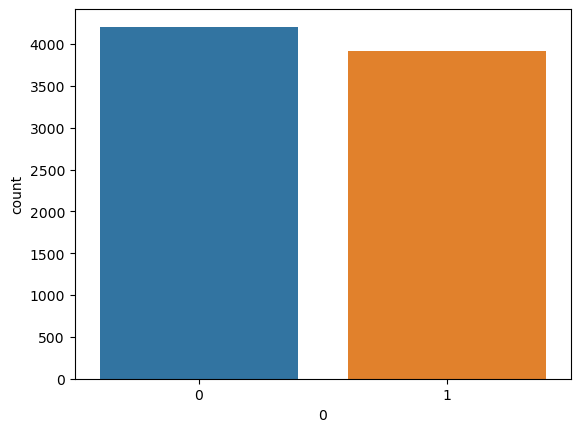

In [10]:
y.value_counts()

sns.countplot(data=y,x=0)

<Axes: >

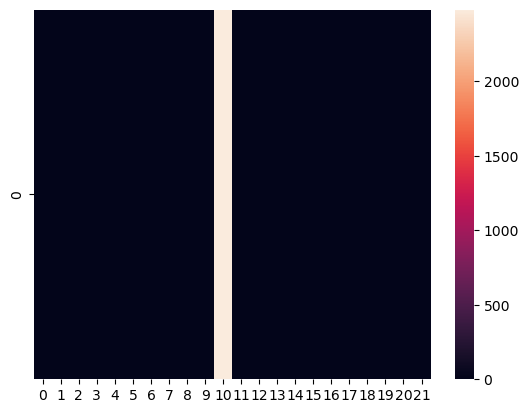

In [11]:
sns.heatmap([X.isna().sum()])

In [12]:
from sklearn.impute import SimpleImputer

columns_name=X.columns

imputer=SimpleImputer(strategy='most_frequent')
X=imputer.fit_transform(X)

X=pd.DataFrame(X,columns=columns_name)

In [13]:
X.isna().sum().sum()

0

In [14]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [15]:
X['cap-shape'].value_counts()

cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

In [16]:
for i in X.columns:
    X[i].value_counts()

cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64

cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64

bruises
f    4748
t    3376
Name: count, dtype: int64

odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64

gill-attachment
f    7914
a     210
Name: count, dtype: int64

gill-spacing
c    6812
w    1312
Name: count, dtype: int64

gill-size
b    5612
n    2512
Name: count, dtype: int64

gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64

stalk-shape
t    4608
e    3516
Name: count, dtype: int64

stalk-root
b    6256
e    1120
c     556
r     192
Name: count, dtype: int64

stalk-surface-above-ring
s    5176
k    2372
f     552
y      24
Name: count, dtype: int64

stalk-surface-below-ring
s    4936
k    2304
f     600
y     284
Name: count, dtype: int64

stalk-color-above-ring
w    4464
p    1872
g     576
n     448
b     432
o     192
e      96
c      36
y       8
Name: count, dtype: int64

stalk-color-below-ring
w    4384
p    1872
g     576
n     512
b     432
o     192
e      96
c      36
y      24
Name: count, dtype: int64

veil-type
p    8124
Name: count, dtype: int64

veil-color
w    7924
n      96
o      96
y       8
Name: count, dtype: int64

ring-number
o    7488
t     600
n      36
Name: count, dtype: int64

ring-type
p    3968
e    2776
l    1296
f      48
n      36
Name: count, dtype: int64

spore-print-color
w    2388
n    1968
k    1872
h    1632
r      72
u      48
o      48
y      48
b      48
Name: count, dtype: int64

population
v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: count, dtype: int64

habitat
d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: count, dtype: int64

In [17]:
# Dataset metedata'sini uci'dan inceledigimizde binary verilerin olduğu belirtilmiş. 
X.loc[:, 'veil-type'] = X['veil-type'].replace(to_replace={'p':0, 'u':1})


In [18]:
X['veil-type'].value_counts()

veil-type
0    8124
Name: count, dtype: int64

In [19]:
X['bruises'].value_counts()

bruises
f    4748
t    3376
Name: count, dtype: int64

In [20]:
X.loc[:, 'bruises'] = X['bruises'].replace(to_replace={'t':1, 'f':0})

In [21]:
X['cap-color'].value_counts()

cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64

In [22]:
columns_list=list(X.columns)
columns_list

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [23]:
columns_list.remove('veil-type')

In [24]:
columns_list.remove('bruises')

In [25]:
from sklearn.preprocessing import TargetEncoder
from sklearn.pipeline import Pipeline

pipeline=Pipeline([
    ('encoder',TargetEncoder(target_type='binary'))
])

pipeline.fit(X[columns_list],y.squeeze())
X.loc[:, columns_list] = pipeline.transform(X[columns_list])

Pipeline(steps=[('encoder', TargetEncoder(target_type='binary'))])

In [26]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0.467181,0.552398,0.4466,1,1.0,0.492544,0.558415,0.885285,0.157284,0.54037,...,0.311213,0.383533,0.383233,0,0.493184,0.508543,0.205691,0.11974,0.294997,0.738592
1,0.467181,0.552398,0.626739,1,0.0,0.492544,0.558415,0.301524,0.157284,0.54037,...,0.311213,0.383533,0.383233,0,0.493184,0.508543,0.205691,0.113897,0.0,0.344564
2,0.106511,0.552398,0.307835,1,0.0,0.492544,0.558415,0.301524,0.107007,0.54037,...,0.311213,0.383533,0.383233,0,0.493184,0.508543,0.205691,0.113897,0.0,0.123819
3,0.467181,0.536358,0.307835,1,1.0,0.492544,0.558415,0.885285,0.107007,0.54037,...,0.311213,0.383533,0.383233,0,0.493184,0.508543,0.205691,0.11974,0.294997,0.738592
4,0.467181,0.552398,0.439153,0,0.03403,0.492544,0.08546,0.301524,0.157284,0.43751,...,0.311213,0.383533,0.383233,0,0.493184,0.508543,0.636836,0.113897,0.0,0.344564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.724404,0.552398,0.4466,0,0.03403,0.086306,0.558415,0.301524,0.257802,0.54037,...,0.311213,0.0,0.0,0,0.0,0.508543,0.205691,0.0,0.153443,0.711312
8120,0.467181,0.552398,0.4466,0,0.03403,0.086306,0.558415,0.301524,0.257802,0.54037,...,0.311213,0.0,0.0,0,0.0,0.508543,0.205691,0.0,0.704905,0.711312
8121,0.493651,0.552398,0.4466,0,0.03403,0.086306,0.558415,0.301524,0.107007,0.54037,...,0.311213,0.0,0.0,0,0.0,0.508543,0.205691,0.0,0.153443,0.711312
8122,0.724404,0.536358,0.4466,0,1.0,0.492544,0.558415,0.885285,1.0,0.43751,...,0.937454,0.383533,0.383233,0,0.493184,0.508543,0.636836,0.758709,0.704905,0.711312


In [27]:
X.isna().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [28]:
X['stalk-root']

0       0.228731
1       0.079348
2       0.079348
3       0.228731
4       0.228731
          ...   
8119     0.57799
8120     0.57799
8121     0.57799
8122     0.57799
8123     0.57799
Name: stalk-root, Length: 8124, dtype: object

In [29]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

<Figure size 3000x1000 with 0 Axes>

<Axes: >

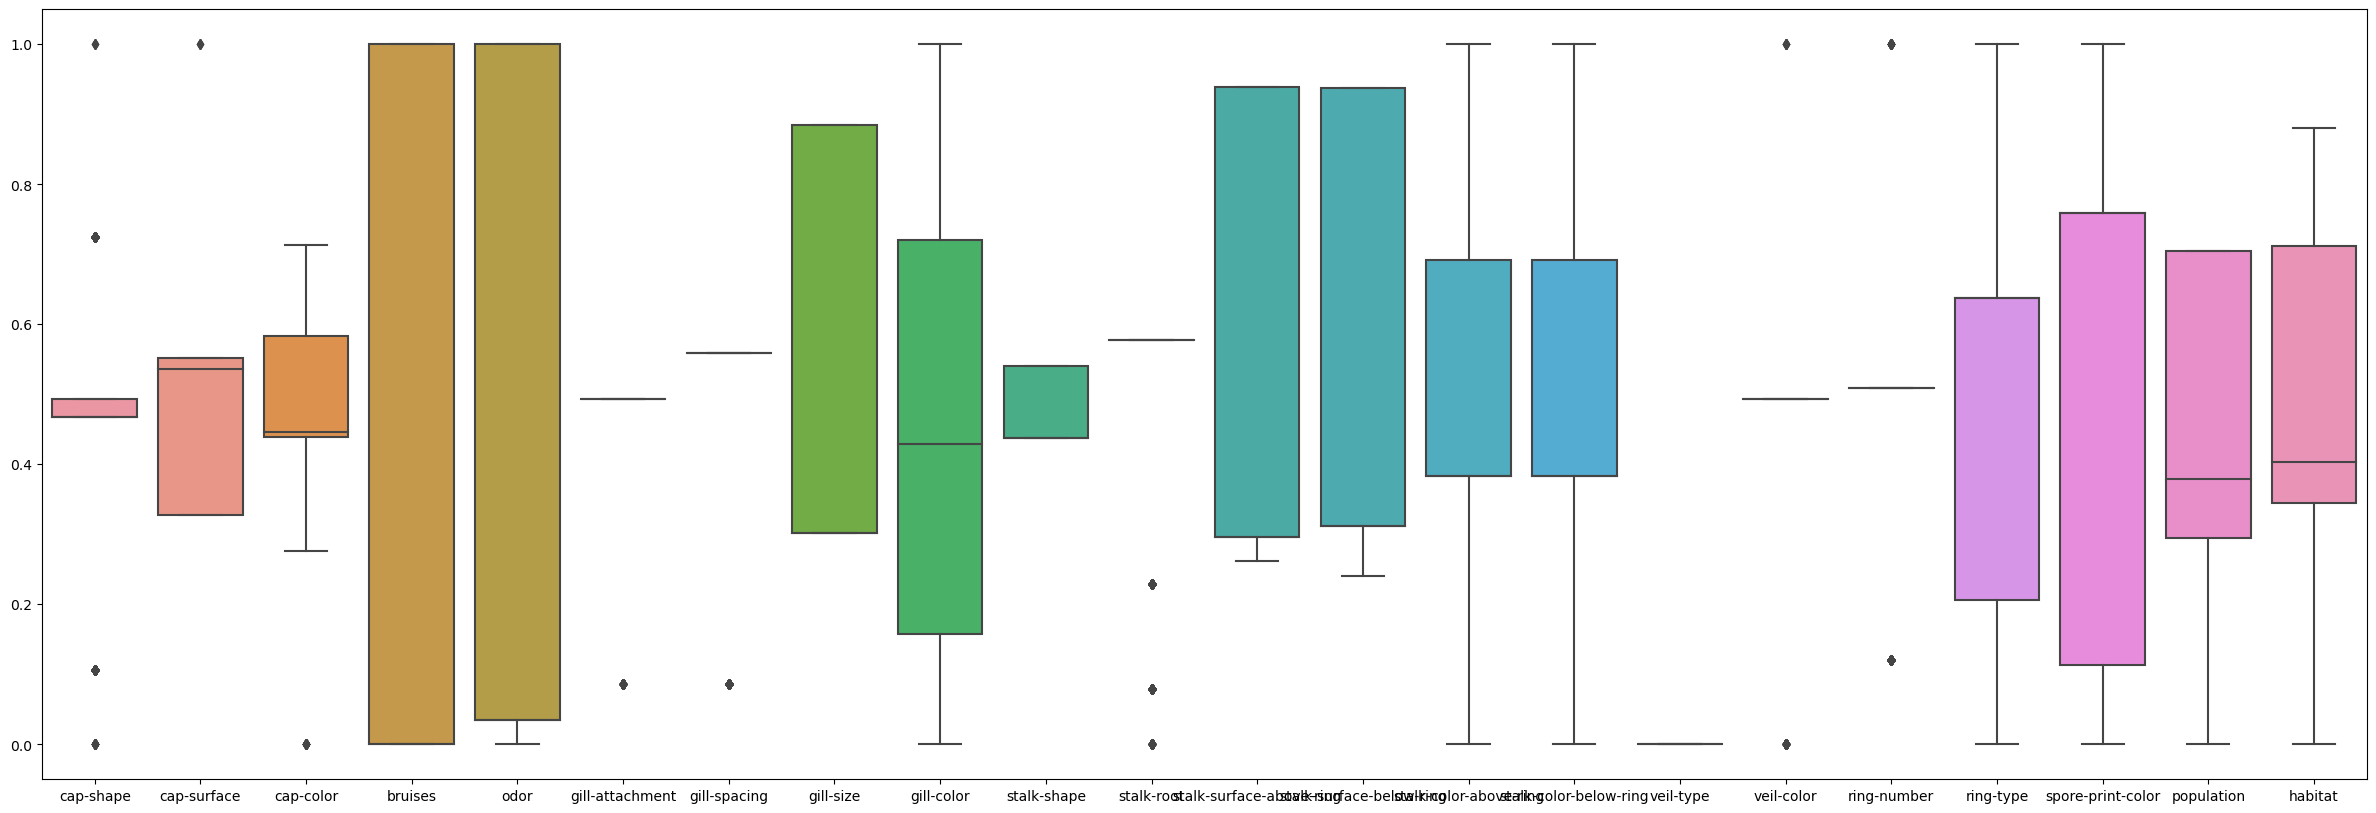

In [30]:
plt.figure(figsize=(30,10))
sns.boxplot(X_train)

<Figure size 3000x1000 with 0 Axes>

C:\Users\busra\AppData\Local\Temp\ipykernel_16368\1445500673.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(X_train)


<Axes: ylabel='Density'>

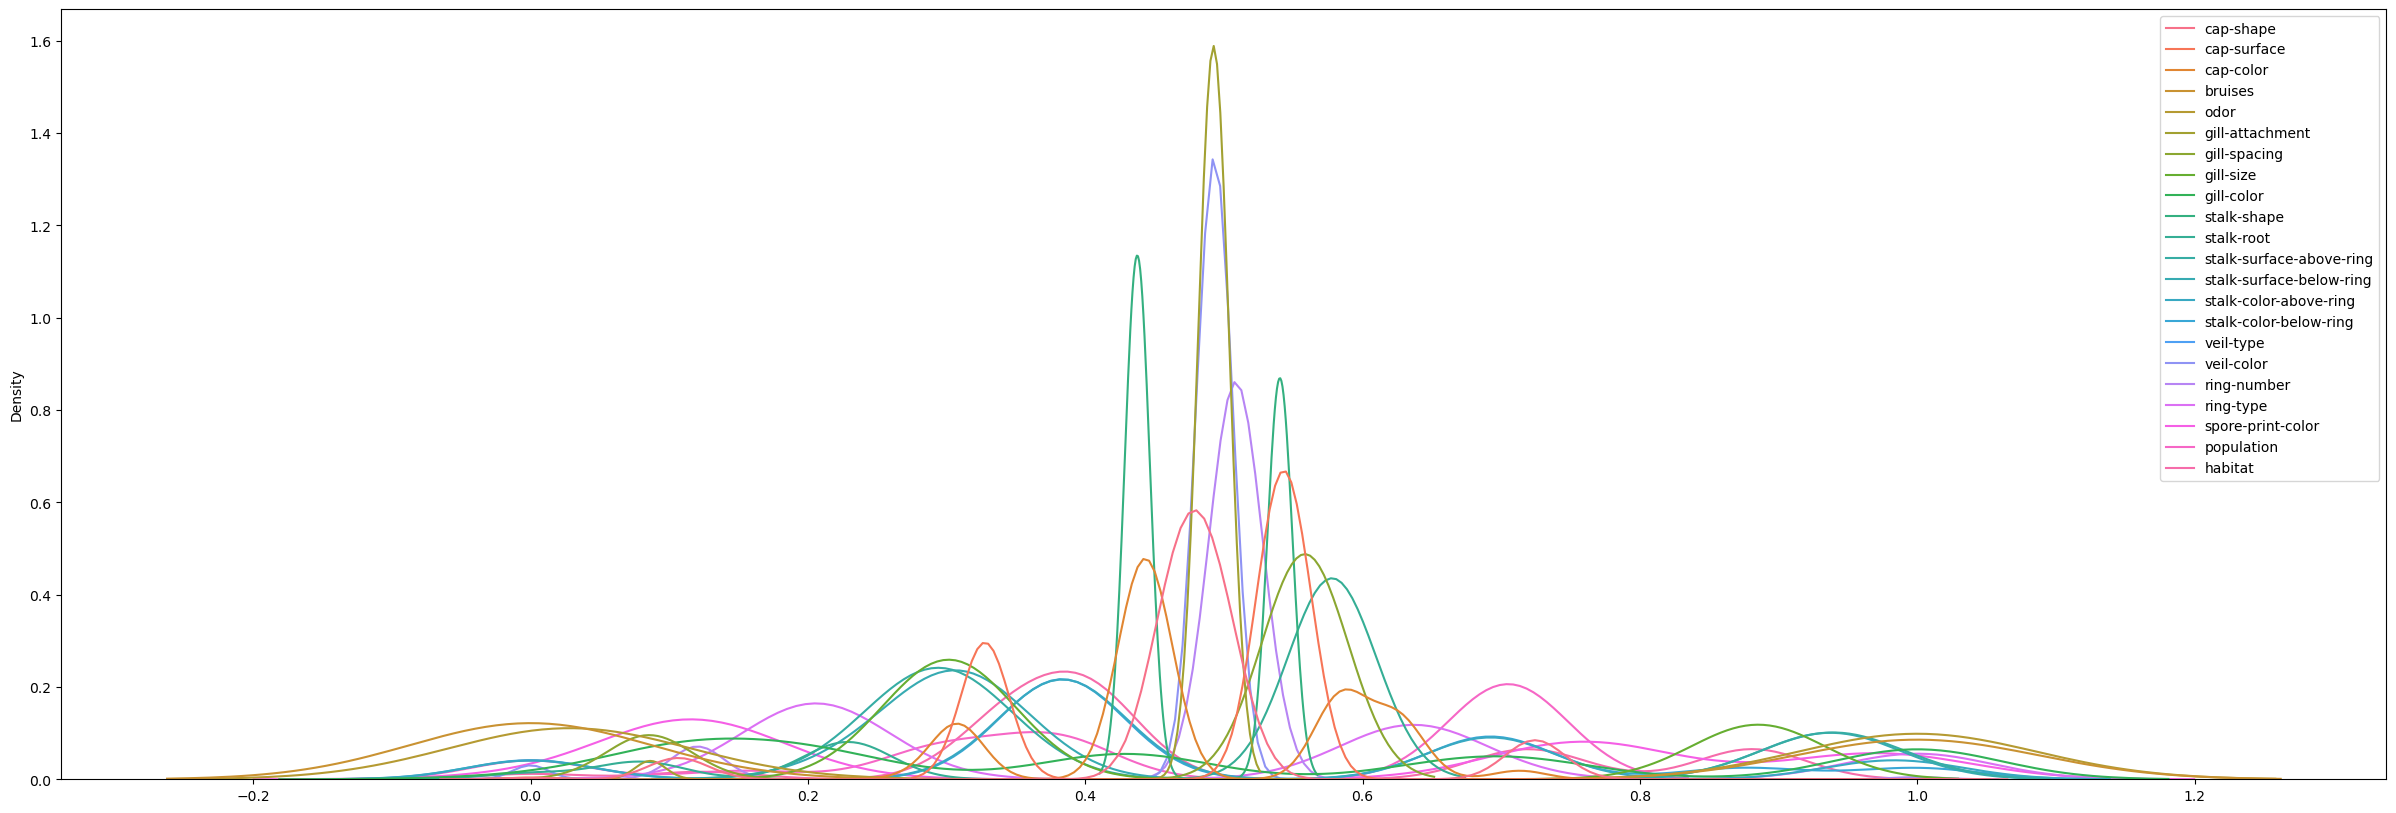

In [33]:
plt.figure(figsize=(30,10))
sns.kdeplot(X_train)

StandardScaler()

<Figure size 2000x1000 with 0 Axes>

<Axes: ylabel='Density'>

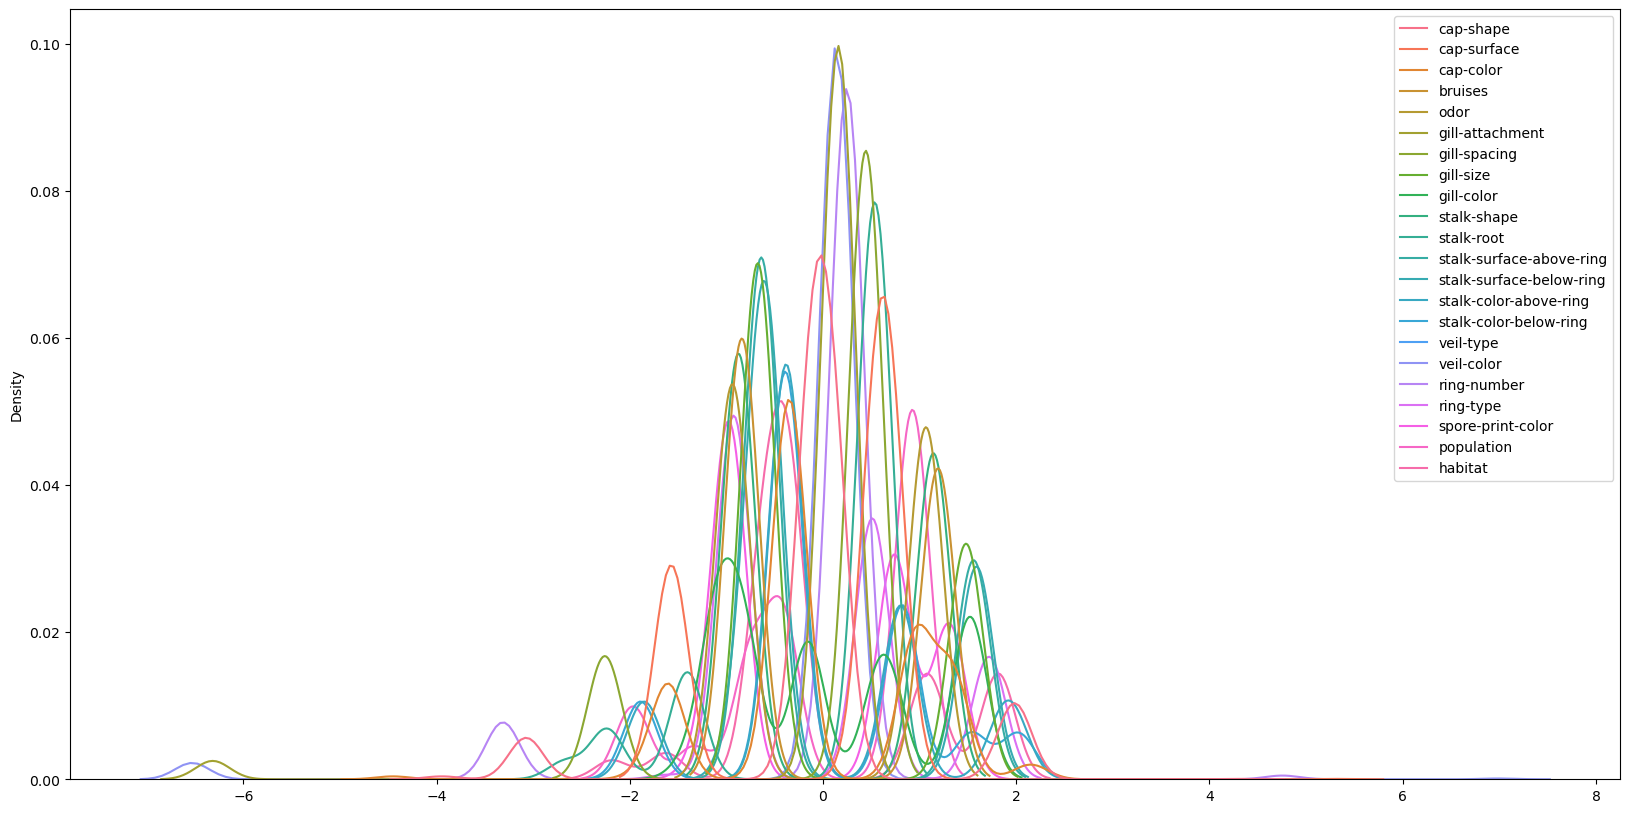

In [159]:
from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()

scaler_std.fit(X_train)
X_train_scaled_std = scaler_std.transform(X_train)
X_train_scaled_std = pd.DataFrame(X_train_scaled_std, columns=X_train.columns)
plt.figure(figsize=(20,10))
sns.kdeplot(X_train_scaled_std)

In [34]:
X_train.dtypes

cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [38]:
for column in X_train.columns:
    X_train[column] = pd.to_numeric(X_train[column], errors='coerce')
    X_test[column] = pd.to_numeric(X_test[column], errors='coerce')

In [49]:
from sklearn.feature_selection import VarianceThreshold

selector=VarianceThreshold(threshold=0.01)
selector.fit(X_train)
X_train_sel=selector.transform(X_train)
X_test_sel=selector.transform(X_test)

VarianceThreshold(threshold=0.01)

In [69]:
from feature_engine.outliers import Winsorizer
winsorizer = Winsorizer(capping_method='quantiles', tail='both')

winsorizer.fit(X_train_sel)
X_train_winsor=winsorizer.transform(X_train_sel)
X_test_winsor=winsorizer.transform(X_test_sel)

Winsorizer(capping_method='quantiles', fold=0.05, tail='both')

<Axes: >

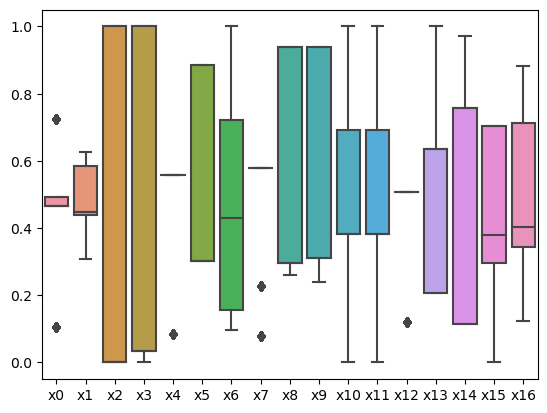

In [71]:
sns.boxplot(X_train_winsor)

In [72]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

model=LogisticRegressionCV(cv=5)

model.fit(X_train_winsor,y_train.squeeze())
y_pred=model.predict(X_test_winsor)
accuracy_score(y_test,y_pred)

LogisticRegressionCV(cv=5)

1.0

<Axes: >

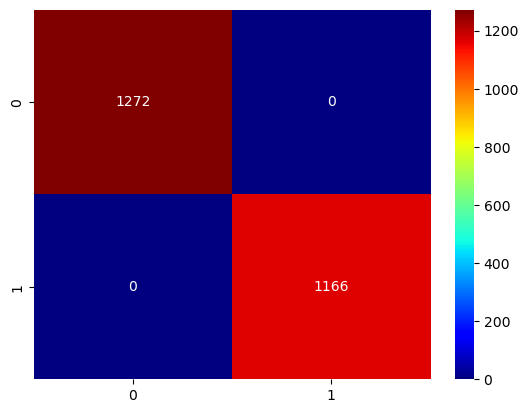

In [75]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='jet')
